In [1]:
%matplotlib inline

from importlib.machinery import SourceFileLoader
import algosdk
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
import re
import json
import joblib

# load custome module from path.
covid19_WebScrapes = SourceFileLoader("covid19_WebScrapes", "./scripts/covid19_WebScrapes.py").load_module()
merge_prep_data = SourceFileLoader("merge_data", "./scripts/merge_prep_data.py").load_module()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 78)

# Read in Cases Data on County Level

In [2]:
covid19_county_level = covid19_WebScrapes.TestingData_Scraper()

Testing_DF = covid19_county_level.Get_Final_DF(Impute = True)

Imputing values where errors in cumulative stats.


KeyboardInterrupt: 

In [3]:
Testing_DF.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Positive,Deaths
371749,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",5/14/20,29,0
371750,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",5/14/20,15,0
371751,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",5/14/20,187,3
371752,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",5/14/20,16,0
371753,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",5/14/20,214,3


# Read in Algorand Blockchain Survey Data

In [4]:
API_KEY=str(np.loadtxt('local_var.txt',dtype=str))[8:]

alg_tx = covid19_WebScrapes.Algorand_Scrape(API_KEY)

algod last round: 6678168
algod time since last round: 3395120744
algod catchup: 0
algod latest version: https://github.com/algorandfoundation/specs/tree/4a9db6a25595c6fd097cf9cc137cc83027787eaa
####################
{'hash': '7OBTXAGKGPS7CJLS5VWP4JXVX7TF7GCOSUNYBP5Y4HMQEXECC3MQ', 'previousBlockHash': 'VZZ72SBX2IERXU5B2GFI7KDGMJHAKJLMZFUARIITHNUPCLWY2UWQ', 'seed': 'SNCFI2L4FRJGI2TJCFFVWPSCFKITSSFQZVBV7NJI55XNLY64M26Q', 'proposer': 'YUDNQMOHAXC4B3BAMRMMQNFDFZ7GYO2HUTBIMNIP7YQ4BL57HZ5VM3AFYU', 'round': 6678168, 'period': 0, 'txnRoot': 'WRS2VL2OQ5LPWBYLNBCZV3MEQ4DACSRDES6IUKHGOWYQERJRWC5A', 'reward': 121688, 'rate': 26000001, 'frac': 372233929, 'txns': {}, 'timestamp': 1589571835, 'currentProtocol': 'https://github.com/algorandfoundation/specs/tree/4a9db6a25595c6fd097cf9cc137cc83027787eaa', 'nextProtocol': 'https://github.com/algorandfoundation/specs/tree/8096e2df2da75c3339986317f9abe69d4fa86b4b', 'nextProtocolApprovals': 10000, 'nextProtocolVoteBefore': 6558530, 'nextProtocolSwitchOn': 66

In [5]:
Survey_DF = alg_tx.Convert_to_DF()

In [6]:
Survey_DF_trim = Survey_DF[['gc','gr','gzp','ga','gs','sz','tz','tt','tr','mz','qz','q1','q2','q3','q4','ql']]
Survey_DF_trim.columns = ['Country','Region','Zip','AgeGroup','Gender','Symptomatic',
                          'Tested','Tested_Attempt','Test_Result','Received_Care','Quarantined',
                          'Q_Symptoms','Q_Voluntary','Q_Personal','Q_General','Left_Quarantine']
Survey_DF_trim.tail()

,Country,Region,Zip,AgeGroup,Gender,Symptomatic,Tested,Tested_Attempt,Test_Result,Received_Care,Quarantined,Q_Symptoms,Q_Voluntary,Q_Personal,Q_General,Left_Quarantine
15561,CZ,PR,None,30,m,-1,-1,None,None,-1,-1,None,None,None,None,None
15562,US,IN,473,30,f,-1,-1,None,None,-1,-1,None,None,None,None,None
15563,US,NY,100,20,f,-1,-1,None,None,-1,1,None,None,None,True,1
15564,BD,None,None,20,None,None,1,None,1,1,-1,None,None,None,None,None
15565,US,NY,131,20,m,-1,-1,None,None,-1,1,None,True,None,None,1


# Read in Wikipedia Area Data

In [7]:
wiki_scraper = covid19_WebScrapes.Wiki_Scrape()

county_areas = wiki_scraper.Scrape_Counties()

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia_(U.S._state),Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New_Hampshire,New_Jersey,New_Mexico,New_York,North_Carolina,North_Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode_Island,South_Carolina,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming,

In [8]:
County_Areas = pd.DataFrame(county_areas,columns=['State','County_FIPS','County','Area (sqmi)'])

In [9]:
County_Areas['Area (sqmi)'] = County_Areas['Area (sqmi)'] .apply(lambda x : str(x).replace(',',''))
County_Areas['Area (sqmi)'] = County_Areas['Area (sqmi)'].astype(float)

In [10]:
County_Areas.head()

,State,County_FIPS,County,Area (sqmi)
0,Alabama,001,Autauga County,594.44
1,Alabama,003,Baldwin County,1589.78
2,Alabama,005,Barbour County,884.88
3,Alabama,007,Bibb County,622.58
4,Alabama,009,Blount County,644.78


# Read in Alphabet Location Data

In [11]:
google = covid19_WebScrapes.Alphabet_Scrape_V2()

google_df = google.get_Data(country='United States',country_only=False,state_only=False) #pulls county info only

google_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
103531,US,United States,Alabama,Autauga County,02/15/20,5.0,7.0,NaN,NaN,-4.0,NaN
103532,US,United States,Alabama,Autauga County,02/16/20,0.0,1.0,-23.0,NaN,-4.0,NaN
103533,US,United States,Alabama,Autauga County,02/17/20,8.0,0.0,NaN,NaN,-27.0,5.0
103534,US,United States,Alabama,Autauga County,02/18/20,-2.0,0.0,NaN,NaN,2.0,0.0
103535,US,United States,Alabama,Autauga County,02/19/20,-2.0,0.0,NaN,NaN,2.0,0.0


# Clean Dataframes, Add FIPS ID's

In [12]:
data_cleaner = covid19_WebScrapes.Clean_Data('FIPS_Codes_USDA.csv','new_state_mapping.txt')

area_data_cleaned = data_cleaner.Clean_Area_Data(County_Areas)
test_data_cleaned = data_cleaner.Clean_Cases_Data(Testing_DF)
google_data_cleaned = data_cleaner.Clean_Loc_Data(google_df)

# Write out dataframes

In [13]:
folder_name = datetime.datetime.strftime(datetime.datetime.today(),'%d%b%y')
os.mkdir('Processed_Data/'+folder_name)

test_data_cleaned.to_csv('Processed_Data/'+folder_name+'/CountyLevel_Cases_Cleaned.csv',index=False)
Survey_DF_trim.to_csv('Processed_Data/'+folder_name+'/Survey_Data.csv',index=False)
area_data_cleaned.to_csv('Processed_Data/'+folder_name+'/CountyLevel_Areas_Cleaned.csv',index=False)
google_data_cleaned.to_csv('Processed_Data/'+folder_name+'/CountyLevel_Google_LocData_Cleaned.csv',index=False)

# Now Merge Data and Engineer some features

In [2]:
data_merger = merge_prep_data.Merge_Data(date_folder='15May20')

merged_census_data = data_merger.Merge_Census_Data()
merged_scraped_data = data_merger.Merge_Scraped_Data()

final_merge = data_merger.MERGE_ALL(merged_scraped_data,merged_census_data)

In [3]:
cols_remove = ['State_x','County_FIPS','County','Name','UID','iso2','iso3','code3','Province_State',
               'Country_Region','Combined_Key','country_region_code','country_region','sub_region_1',
               'sub_region_2','date','unique_id','State_y','STATE_FIPS','Unnamed: 0','county','state_FIPS',
              'county_fips']

final_merge.drop(cols_remove,axis=1,inplace=True)

In [4]:
engineer_feats = merge_prep_data.Engineer_Feats(datatype_write_loc='Merged_Data/data_types.json')

DF_out = engineer_feats.Apply_Logic(final_merge)

Adding Proximity Logic...
Normalizing Stats , lagging features...
Interpolating Data...
retail_and_recreation_percent_change_from_baseline


./scripts/merge_prep_data.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col] = DF.groupby('state')[col].apply(lambda group: group.interpolate(method=stat_fill_method,axis=0).ffill().bfill())


grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


/Users/petersimone/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
./scripts/merge_prep_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col] = DF.groupby('state')[col].apply(lambda group: group.interpolate(method=stat_fill_method,axis=0,).ffill().bfill())
./scripts/merge_prep_data.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Couldn't convert Admin2 to float
Couldn't convert Date to float
Couldn't convert state to float
Couldn't convert Closest_Big_City to float


In [5]:
cols_keep = ['FIPS','state','Admin2','Lat','Long_','Date',
             'Positive','Deaths','Positive_Cases_PopNormed','Deaths_PopNormed',
             'New_Positive_Cases_PopNormed_Lagged',
             'New_Positive_Cases_PopNormed',
             'Area (sqmi)','population','Proximity','Population_Density','Percent_in_Workforce',
             'Households_per_SqMile',
             'retail_and_recreation_percent_change_from_baseline',
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline',
             'Mass gathering restrictions', 'Initial business closure',
             'Educational facilities closed', 'Non-essential services closed',
             'Stay at home order', 'Travel severely limited',
             '%_family_households', '%_single_male_households',
             '%_single_female_households', '%_living_alone',
             'total_household_income', 'household_income_less_than_25_years',
             'household_income_25_to_45_years', 'household_income_45_to_65_years',
             'household_income_65_and_older',
             '%_households_with_earnings_last12',
             '%_households_with_no_earnings_last12', '%_in_poverty',
             '%_in_poverty_18_to_59', '%_in_poverty_60_to_74',
             '%_in_poverty_75_to_85',
             '%_white', '%_black',
             '$_other_race', 
             '%_male', '%_female', 
             '%_male_pop_greater_than_60','%_female_pop_greater_than_60',
             '%_workers_less_than_15_to_work', '%_workers_15_to_45_to_work',
             '%_workers_greater_than_45_to_work',
             '%_drive_alone_to_work', '%_carpool_to_work',
             '%_public_transit_to_work', '%_bus_trolley_to_work', '%_walked_to_work',
             '%_cab_other_means_of_transportation_to_work','jail_incarceration_rate_per_100k']

In [6]:
DF_write = DF_out[cols_keep]

In [7]:
engineer_feats.write_out_json(DF_write)

In [8]:
folder_name = datetime.datetime.strftime(datetime.datetime.today(),'%d%b%y')
if not os.path.exists('Merged_Data/'+folder_name) :
    os.mkdir('Merged_Data/'+folder_name)

DF_write.to_csv('Merged_Data/'+folder_name+'/Final_Merged.csv',index=False) #write out csv file

## Can start to assess

In [2]:
with open('Merged_Data/data_types.json', 'r') as f:
    dtypes_read = json.load(f)
    
    
#folder_name = datetime.datetime.strftime(datetime.datetime.today(),'%d%b%y')
folder_name =    '17MAY20'

DF = pd.read_csv('Merged_Data/'+folder_name+'/Final_Merged.csv',dtype=dtypes_read)

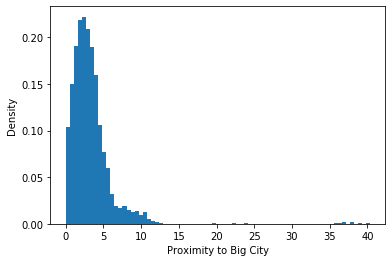

In [3]:
plt.hist(DF['Proximity'],bins=75,density=True)
plt.xlabel('Proximity to Big City')
plt.ylabel('Density')
plt.show()

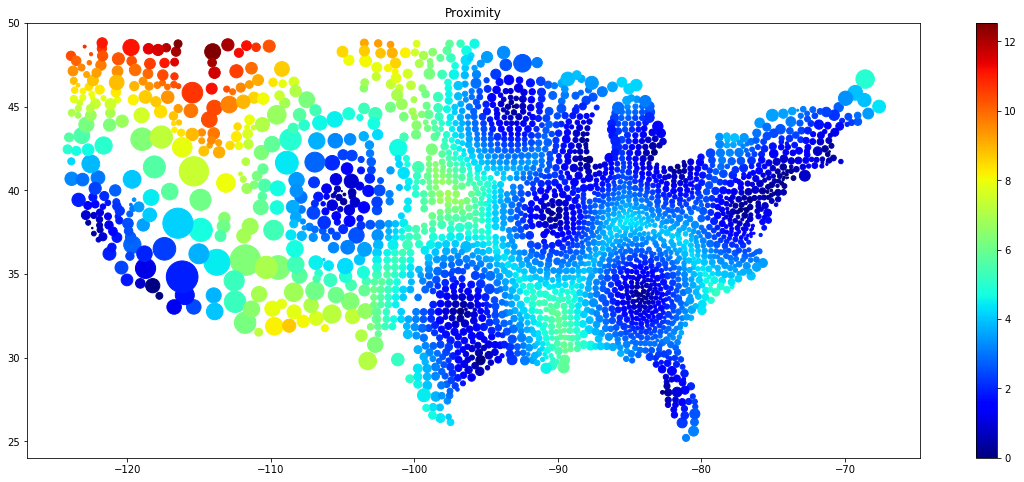

In [4]:
col_plot = 'Proximity'

xlim = [-130,-60]
ylim = [23,50]
to_plot = DF[(DF['Date'] == '05/14/20') & (DF['Long_']>xlim[0]) & (DF['Long_'] < xlim[1]) &
                  (DF['Lat']>ylim[0]) & (DF['Lat'] < ylim[1])]


plt.figure(figsize=(20,8))
plt.scatter(to_plot['Long_'],
            to_plot['Lat'],
            c=to_plot[col_plot],
            s=to_plot['Area (sqmi)']/20,
            cmap=plt.get_cmap('jet'))
plt.colorbar()
plt.title(col_plot)
plt.show()

In [25]:
# Group by state , for visualization purposes.

# Remove territories
DF_Grouped = DF.groupby(['state','Date'],as_index=False)[['Positive','Deaths']].agg('sum').reset_index(drop=True)

# pad data format to match up with datetime format
DF_Grouped['Date'] = DF_Grouped['Date'].apply(lambda x : '/'.join([a.zfill(2) for a in x.split('/')]))

## Generate new features :

DF_Grouped['Cum_Death_Rate'] = DF_Grouped['Deaths']/DF_Grouped['Positive']
DF_Grouped['Cum_Death_Rate'] = DF_Grouped['Cum_Death_Rate'].fillna(0)


In [26]:
def New_Cases_Smoothed(col_new,smooth_num=1) :
    
    new_add = []

    for i,v in DF_Grouped.iterrows() :
        state = v['state']
        date = datetime.datetime.strptime(v['Date'],'%m/%d/%y')
        date_m1 = [datetime.datetime.strftime(date - datetime.timedelta(days=i),'%m/%d/%y') for 
                   i in range(smooth_num+1)]

        old_row = DF_Grouped[(DF_Grouped['state'] == state) & 
                                  (DF_Grouped['Date'].isin(date_m1))]
        new_add.append((max(old_row[col_new].values) - min(old_row[col_new].values)) / smooth_num)
            
    return new_add
    
smoothing_factor = 5 #smooth by 2. Reduced noise in plot

new_pos_cases = New_Cases_Smoothed('Positive',smoothing_factor)    
new_death_cases = New_Cases_Smoothed('Deaths',smoothing_factor) 
DF_Grouped['New_Positive_Cases_Smoothed'] = new_pos_cases
DF_Grouped['New_Deaths_Smoothed'] = new_death_cases

DF_Grouped.head()

,state,Date,Positive,Deaths,Cum_Death_Rate,New_Positive_Cases_Smoothed,New_Deaths_Smoothed
0,AK,03/14/20,1.0,0.0,0.0,0.0,0.0
1,AK,03/15/20,1.0,0.0,0.0,0.0,0.0
2,AK,03/16/20,1.0,0.0,0.0,0.0,0.0
3,AK,03/17/20,3.0,0.0,0.0,0.4,0.0
4,AK,03/18/20,5.0,0.0,0.0,0.8,0.0


In [27]:
date_mapping = dict(zip(sorted(list(DF_Grouped['Date'].unique())),range(len(set(DF_Grouped['Date'])))))
DF_Grouped['Days_Since_First_Case'] = DF_Grouped['Date'].map(date_mapping)

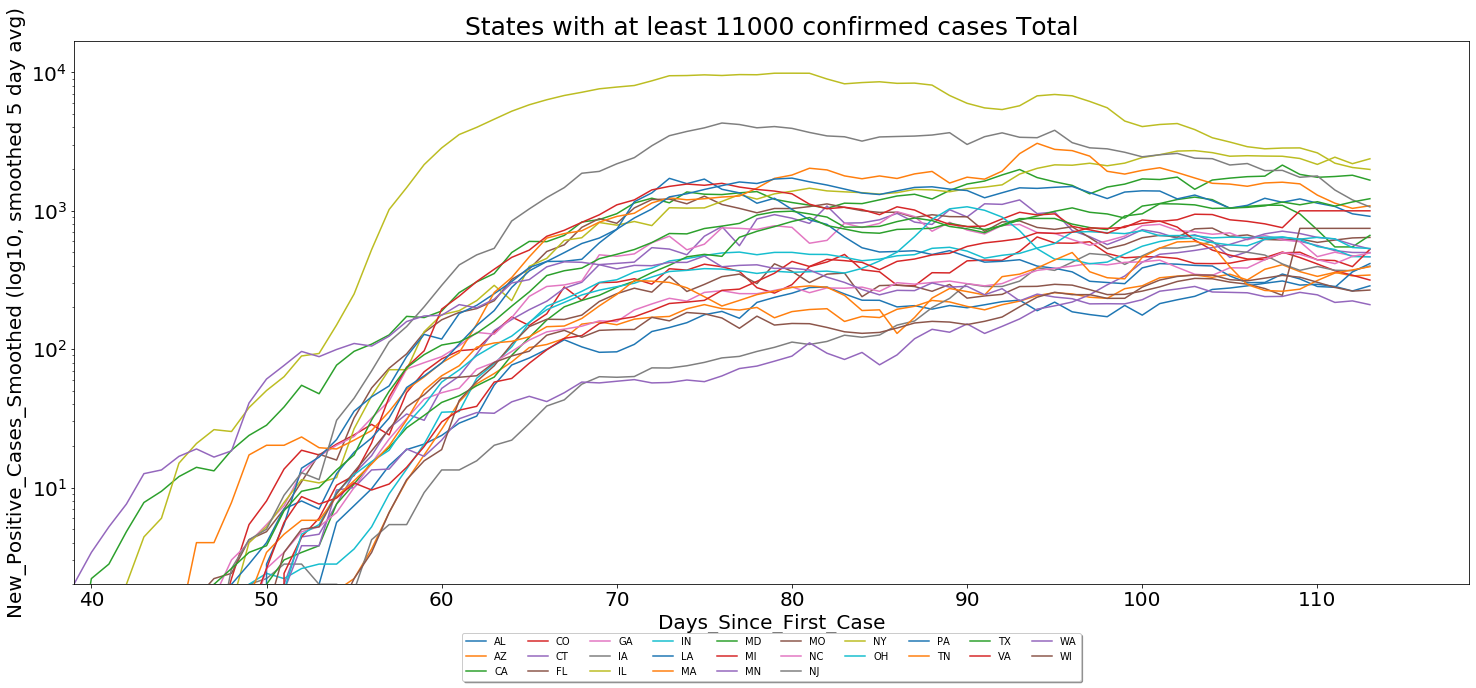

In [28]:
col_plot = 'New_Positive_Cases_Smoothed'

show_for = 11000 #A state needs to have more than this to be plotted
ymin = 2
xmin = min(DF_Grouped[DF_Grouped[col_plot]>=ymin]['Days_Since_First_Case'])

legend_added = []
plt.figure(figsize=(25,10))
for state in DF_Grouped['state'].unique() :
    subbed = DF_Grouped[DF_Grouped['state'] == state]
    subbed = subbed.sort_values('Days_Since_First_Case')
    #dates_xaxis = subbed['Date'].apply(lambda  x : datetime.datetime.strptime(x,'%m/%d/%y'))
    dates_xaxis = subbed['Days_Since_First_Case']
    if max(subbed['Positive'] >= show_for) :
        plt.plot(dates_xaxis,subbed[col_plot])
        legend_added.append(state)
plt.yscale('log')
plt.legend(legend_added,loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Days_Since_First_Case',size=20)
plt.ylabel('{} (log10, smoothed {} day avg)'.format(col_plot,smoothing_factor),size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(xmin=xmin)
plt.ylim(ymin=ymin)
plt.title('States with at least {} confirmed cases Total'.format(show_for),size=25)
plt.show()

# Assess stay at home orders.

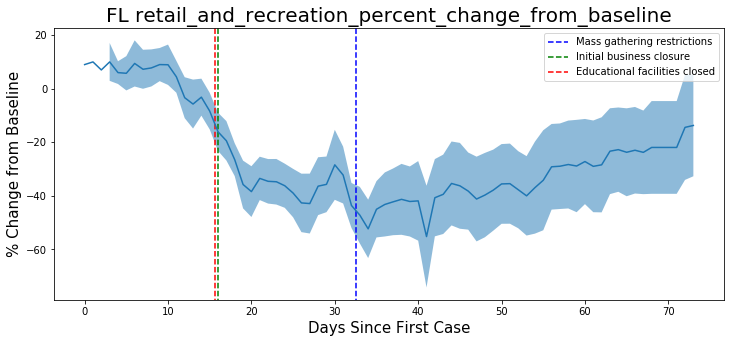

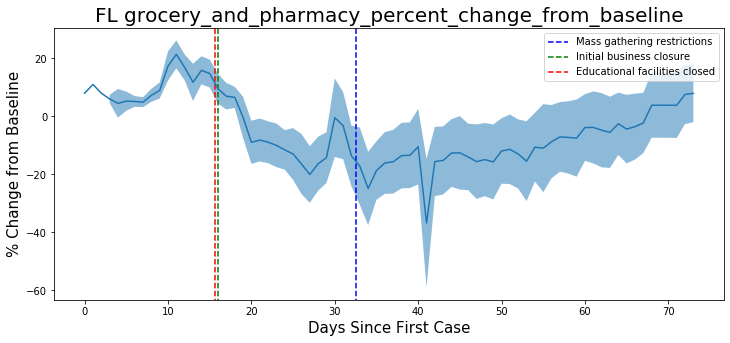

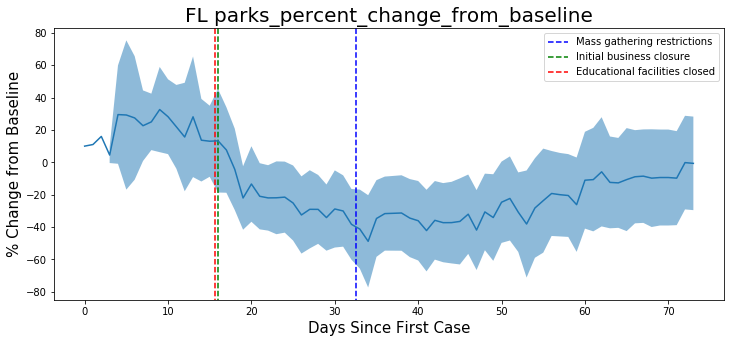

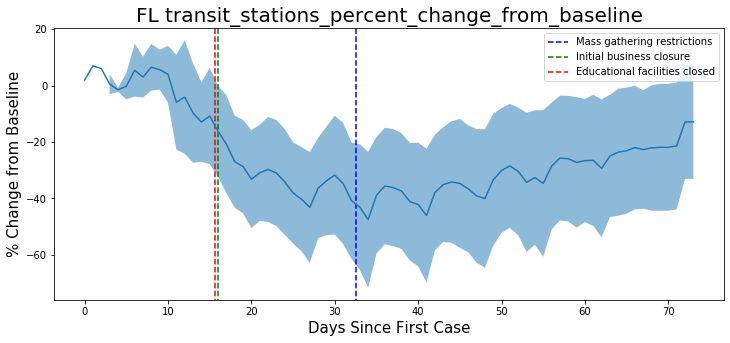

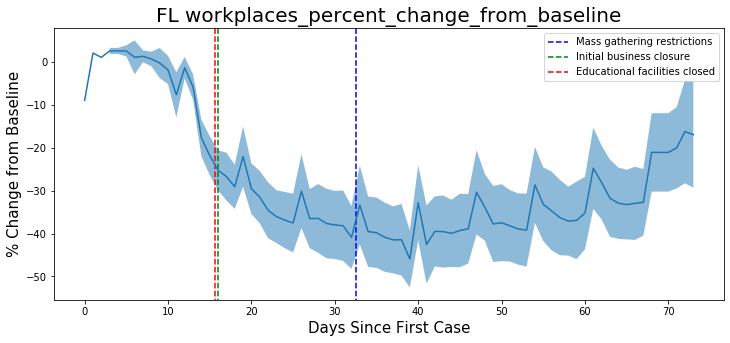

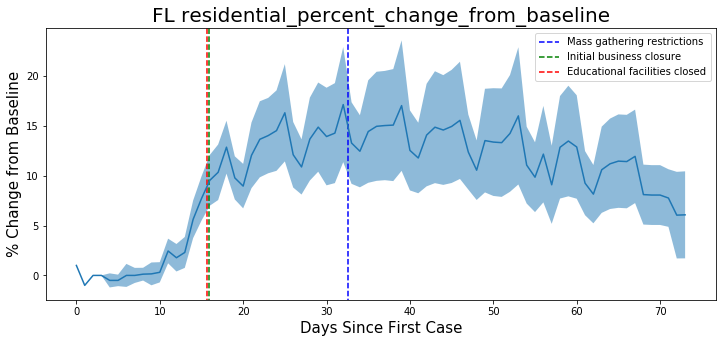

In [7]:
state_assess = 'FL'

orders_columns = ['Mass gathering restrictions', 'Initial business closure',
                  'Educational facilities closed', 'Non-essential services closed',
                  'Stay at home order', 'Travel severely limited']

google_columns = ['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline']

colors = ['b','g','r','y','k','c']


orders_dates = {}
for order_col in orders_columns :
    try :
        appearance_order = list(DF[DF['state'] == state_assess][order_col]).index(1)
        date_order = DF[DF['state'] == state_assess]['Date'].values[appearance_order]
    except :
        continue
    orders_dates[order_col] = date_order
    
randomness = np.random.random(len(orders_dates))

for col in google_columns :
    grouped = DF.groupby(['state','Date'])[col].agg(['mean','std'])
    subbed = grouped.iloc[grouped.index.get_level_values('state') == state_assess]
    
    plt.figure(figsize=(12,5))
    
    count = 0
    for orders,date in orders_dates.items() :
        index_order = subbed.index.get_level_values('Date').to_list().index(date)
        min_vals = np.array(subbed['mean'].values-subbed['std'].values)
        min_vals = min_vals[~np.isnan(min_vals)]
        max_vals = np.array(subbed['mean'].values+subbed['std'].values)
        max_vals = max_vals[~np.isnan(max_vals)]
        plt.axvline(x=index_order+randomness[count],ymin=min(min_vals),
               ymax = max(max_vals),label=orders,c=colors[count],linestyle='--')
        count += 1
    plt.title(state_assess+' '+col,fontsize=20)
    plt.plot(range(subbed.shape[0]),subbed['mean'])
    plt.fill_between(range(subbed.shape[0]),subbed['mean'].values+subbed['std'].values,
                     subbed['mean'].values-subbed['std'].values,
                     alpha=.5)
    plt.xlabel('Days Since First Case',fontsize=15)
    plt.ylabel('% Change from Baseline',fontsize=15)
    plt.legend()
    plt.show()

In [100]:
orders_dates

['03/14/20', '03/16/20', '03/18/20', '03/22/20', '03/22/20', nan]

# Read In model, Assess

In [5]:
DF['bias'] = 1

min_value = min(DF['Positive_Cases_PopNormed'])

target_lagged_count = 7
num_lagged_feat_include = 3

for n in range(num_lagged_feat_include) :
    if n == 0 :
        DF['Positive_Cases_PopNormed_Scaled_lagged_1'] = np.log(DF['Positive_Cases_PopNormed']/min_value)
        continue
    new_col = 'Positive_Cases_PopNormed_Scaled_lagged_'+str(n+1)
    DF[new_col] = DF.groupby('FIPS')['Positive_Cases_PopNormed_Scaled_lagged_1'].shift(n)

#DF['Positive_Cases_PopNormed_Scaled_Target'] = DF.groupby('FIPS')['Positive_Cases_PopNormed_Scaled_lagged_1'].shift(lagged_count)                 
DF = DF.dropna()

In [6]:
model = joblib.load('Pete_Exploratory/AdaBoost_Model_19MAY2020.pkl')

In [7]:
DF_to_predict = DF.drop(['FIPS', 'state', 'Admin2', 'Lat', 'Long_', 
                         'Date', 'Positive', 'Deaths','Positive_Cases_PopNormed',
                         'Deaths_PopNormed','New_Positive_Cases_PopNormed_Lagged',
                         'New_Positive_Cases_PopNormed'],axis=1)

In [8]:
DF_to_predict['predictions'] = model.predict(DF_to_predict)

DF['predictions'] = DF_to_predict['predictions']

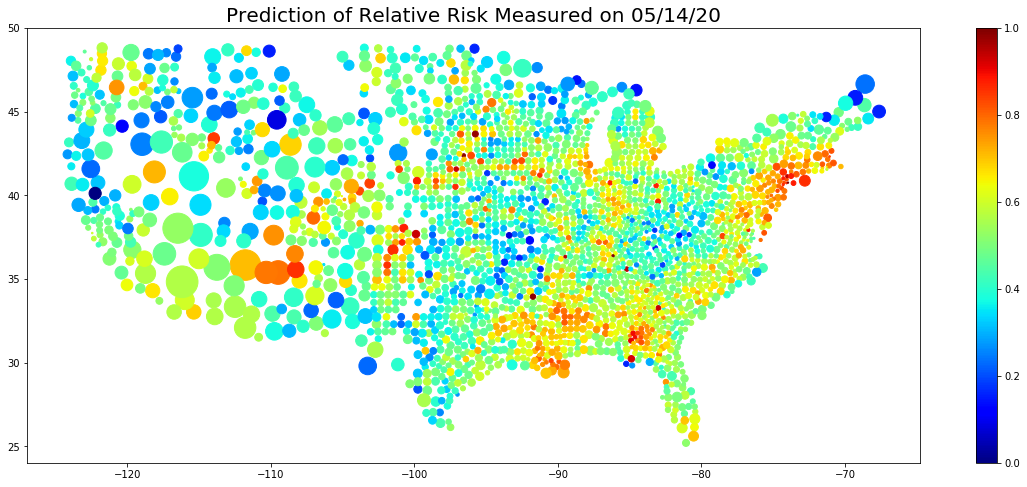

In [17]:
col_plot = 'predictions'
date_predict = '05/14/20'

xlim = [-130,-60]
ylim = [23,50]

to_plot = DF[(DF['Date'] == date_predict) & (DF['Long_']>xlim[0]) & (DF['Long_'] < xlim[1]) &
                  (DF['Lat']>ylim[0]) & (DF['Lat'] < ylim[1])]


plt.figure(figsize=(20,8))
plt.scatter(to_plot['Long_'],
            to_plot['Lat'],
            c=(to_plot[col_plot] - min(to_plot[col_plot]))/(max(to_plot[col_plot]) - min(to_plot[col_plot])),
            s=to_plot['Area (sqmi)']/20,
            cmap=plt.get_cmap('jet'))
plt.colorbar()
#plt.xticks([])
#plt.yticks([])
plt.title('Prediction of Relative Risk Measured on {}'.format(date_predict),fontsize=20)
plt.show()

In [10]:
feat_importance = dict(zip(DF_to_predict.columns,model.feature_importances_))
sorted(feat_importance.items(), key=lambda x: x[1])

[('Travel severely limited', 0.0),
 ('bias', 0.0),
 ('Initial business closure', 0.0001492689032955208),
 ('Stay at home order', 0.0003306195488210648),
 ('Mass gathering restrictions', 0.0003435494375517392),
 ('Non-essential services closed', 0.00035564369472152195),
 ('Educational facilities closed', 0.00048085126808608607),
 ('total_household_income', 0.001393193426813385),
 ('household_income_45_to_65_years', 0.0013975561188731547),
 ('%_in_poverty_18_to_59', 0.001487712989904827),
 ('Positive_Cases_PopNormed_Scaled_lagged_2', 0.0015928328316777817),
 ('household_income_25_to_45_years', 0.00160110760277611),
 ('%_in_poverty', 0.0016169485495334732),
 ('%_in_poverty_60_to_74', 0.0017421417566040585),
 ('%_households_with_earnings_last12', 0.001767727456350724),
 ('%_male', 0.0017722417877696294),
 ('%_bus_trolley_to_work', 0.00181573908792078),
 ('%_family_households', 0.0018601538999931371),
 ('%_female', 0.0018930678298237076),
 ('%_male_pop_greater_than_60', 0.001913502411251134